# Average Income in LA County Census Exploration
### Matthew Lach
For this assignment, I will analyze the average income of each of the block groups from Los Angeles County. This is useful for my project because I want to analyze environmental inequality when it comes to socioeconomic status. While I will likely have to look at other factors, lower income areas experience more negative environmental impacts. I chose to look at block groups instead of census tracts becuase I would assume the environmental impact of a facotry, landfill, etc will be the most prominent closest to the facility. I will use pandas to analyze and plot a csv with Census data. Then I will combine the Census data with a geojson using geopandas to create maps.

## Using Pandas to Analyze Census csv 
First, we need to import pandas in order to be able to import and read our Census csv file

In [1]:
#import pandas for csv file
import pandas as pd

Next, we import our csv file from Social Explorer using pandas. It will be referred to as 'df'

In [2]:
#import data
df = pd.read_csv("R12729418_SL150.csv")

We will look at the number of columns and rows using the shape command.

In [4]:
#show the shape of the dataset
df.shape

(6425, 56)

It will also be useful to look at the first rows of the dataset by using the head command.

In [109]:
#show first 5 rows
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_BLKGRP,AverageInc
0,060371011101,15000US060371011101,Block Group 1,"Block Group 1, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14303,06,037,101110,1,80985.979730
1,060371011102,15000US060371011102,Block Group 2,"Block Group 2, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14304,06,037,101110,2,63012.116041
2,060371011103,15000US060371011103,Block Group 3,"Block Group 3, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14305,06,037,101110,3,89837.279597
3,060371011221,15000US060371011221,Block Group 1,"Block Group 1, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14306,06,037,101122,1,120353.985507
4,060371011222,15000US060371011222,Block Group 2,"Block Group 2, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14307,06,037,101122,2,104108.884298


## Cleaning the Data
We will use the info command with the addition of two arguments to account for the size of the dataset. This result shows us which columns have values and the data type of each.

In [12]:
#show dataset info
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6425 entries, 0 to 6424
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       6425 non-null   int64  
 1   Geo_GEOID      6425 non-null   object 
 2   Geo_NAME       6425 non-null   object 
 3   Geo_QName      6425 non-null   object 
 4   Geo_STUSAB     6425 non-null   object 
 5   Geo_SUMLEV     6425 non-null   int64  
 6   Geo_GEOCOMP    6425 non-null   int64  
 7   Geo_FILEID     6425 non-null   object 
 8   Geo_LOGRECNO   6425 non-null   int64  
 9   Geo_US         0 non-null      float64
 10  Geo_REGION     0 non-null      float64
 11  Geo_DIVISION   0 non-null      float64
 12  Geo_STATECE    0 non-null      float64
 13  Geo_STATE      6425 non-null   int64  
 14  Geo_COUNTY     6425 non-null   int64  
 15  Geo_COUSUB     0 non-null      float64
 16  Geo_PLACE      0 non-null      float64
 17  Geo_PLACESE    0 non-null      float64
 18  Geo_TRAC

As we can see, the dataset includes FIPS data that is associated to the location of each block group. However, the data is read as an integer instead of a string, so the "0" is eliminated at the start of every FIPS number.

If we look at just the first few rows in the Geo_FIPS column using .head, we see that there is no 0 at the start.

In [14]:
#shows the above problem of the missing 0
df.Geo_FIPS.head()

0    60371011101
1    60371011102
2    60371011103
3    60371011221
4    60371011222
Name: Geo_FIPS, dtype: int64

In order to stop the program from removing the 0, we need to change the data type of the FIPS data to strings. This forces the numbers to be read as characters instead of numbers.

In [19]:
#change data types to strings
df = pd.read_csv(
    "R12729418_SL150.csv", dtype=
    { 
      "Geo_FIPS":str,
      "Geo_STATE":str,
      "Geo_COUNTY":str,
      "Geo_TRACT":str
    })

In [20]:
#show new results for Geo data
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A14008_001
0,060371011101,15000US060371011101,Block Group 1,"Block Group 1, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14303,NaN,NaN,NaN,NaN,06,037,NaN,NaN,NaN,101110,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80985.979730
1,060371011102,15000US060371011102,Block Group 2,"Block Group 2, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14304,NaN,NaN,NaN,NaN,06,037,NaN,NaN,NaN,101110,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63012.116041
2,060371011103,15000US060371011103,Block Group 3,"Block Group 3, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14305,NaN,NaN,NaN,NaN,06,037,NaN,NaN,NaN,101110,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89837.279597
3,060371011221,15000US060371011221,Block Group 1,"Block Group 1, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14306,NaN,NaN,NaN,NaN,06,037,NaN,NaN,NaN,101122,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120353.985507
4,060371011222,15000US060371011222,Block Group 2,"Block Group 2, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14307,NaN,NaN,NaN,NaN,06,037,NaN,NaN,NaN,101122,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104108.884298


Now the Geo data is displayed correctly for each level of the FIPS number.

### Removing Unnecessary Columns
As shown previously, there are many unnecessary columns in the dataset. In order to get rid of these columns, we will first use info to get a list of which columns have data.

In [21]:
#show info again after changing dtypes
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6425 entries, 0 to 6424
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       6425 non-null   object 
 1   Geo_GEOID      6425 non-null   object 
 2   Geo_NAME       6425 non-null   object 
 3   Geo_QName      6425 non-null   object 
 4   Geo_STUSAB     6425 non-null   object 
 5   Geo_SUMLEV     6425 non-null   int64  
 6   Geo_GEOCOMP    6425 non-null   int64  
 7   Geo_FILEID     6425 non-null   object 
 8   Geo_LOGRECNO   6425 non-null   int64  
 9   Geo_US         0 non-null      float64
 10  Geo_REGION     0 non-null      float64
 11  Geo_DIVISION   0 non-null      float64
 12  Geo_STATECE    0 non-null      float64
 13  Geo_STATE      6425 non-null   object 
 14  Geo_COUNTY     6425 non-null   object 
 15  Geo_COUSUB     0 non-null      float64
 16  Geo_PLACE      0 non-null      float64
 17  Geo_PLACESE    0 non-null      float64
 18  Geo_TRAC

Now we need to create a list of all of the columns that do not have any values. I use .isna() in order to identify those columns with no data. This list will be used to drop the null columns with the .dropna command.

In [23]:
#list columns with no values
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

Now that we have a list of the null columns, we need to use the .dropna command in order to redefine 'df' with only the necessary columns.

In [28]:
#drop unnecessary columns
df= df.dropna(axis=1,how='all')

Again using the info command, we see that we now only have columns with all non-null values.

In [29]:
#show new info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6425 entries, 0 to 6424
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       6425 non-null   object 
 1   Geo_GEOID      6425 non-null   object 
 2   Geo_NAME       6425 non-null   object 
 3   Geo_QName      6425 non-null   object 
 4   Geo_STUSAB     6425 non-null   object 
 5   Geo_SUMLEV     6425 non-null   int64  
 6   Geo_GEOCOMP    6425 non-null   int64  
 7   Geo_FILEID     6425 non-null   object 
 8   Geo_LOGRECNO   6425 non-null   int64  
 9   Geo_STATE      6425 non-null   object 
 10  Geo_COUNTY     6425 non-null   object 
 11  Geo_TRACT      6425 non-null   object 
 12  Geo_BLKGRP     6425 non-null   int64  
 13  SE_A14008_001  6379 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 702.9+ KB


In order to visualize the changes made, I will use the .head command to show the new first 5 rows of the dataset.

In [30]:
#show a new chart of the first 5 rows
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_BLKGRP,SE_A14008_001
0,060371011101,15000US060371011101,Block Group 1,"Block Group 1, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14303,06,037,101110,1,80985.979730
1,060371011102,15000US060371011102,Block Group 2,"Block Group 2, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14304,06,037,101110,2,63012.116041
2,060371011103,15000US060371011103,Block Group 3,"Block Group 3, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14305,06,037,101110,3,89837.279597
3,060371011221,15000US060371011221,Block Group 1,"Block Group 1, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14306,06,037,101122,1,120353.985507
4,060371011222,15000US060371011222,Block Group 2,"Block Group 2, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14307,06,037,101122,2,104108.884298


### Renaming Columns
Our main variable in this dataset is the Average Income of each block group. By default, this variable has an obscure name so we will rename it.
First, we will show a list of all the names of the columns.

In [35]:
#list column names
columns=list(df)
columns

['Geo_FIPS',
 'Geo_GEOID',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Geo_BLKGRP',
 'SE_A14008_001']

For convenience, I will rename the Average income variable as "AverageInc", but I will leave the rest the same. I copy and paste the list from above and change the desired variable name.

In [39]:
#change avg inc variable name
df.columns= ['Geo_FIPS',
 'Geo_GEOID',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Geo_BLKGRP',
 'AverageInc']

## Analyzing Average Income Data
Now that the data is clean, we can start to analyze the data based on the average income.
First, we use the .head command to see the first 5 rows of the average income column.

In [40]:
#show "AverageInc" first 5 rows
df['AverageInc'].head()

0     80985.979730
1     63012.116041
2     89837.279597
3    120353.985507
4    104108.884298
Name: AverageInc, dtype: float64

In order to get a sense of the average income of the entirety of LA County, we use .mean() to produce the mean income across all block groups.

In [41]:
#produce mean of 'AverageInc'
df['AverageInc'].mean()

99832.0604934025

This shows that the average income of LA County is about $100,000/year. This is useful to compare to the average income of individual block groups

In order to visualize the spread of the income data across regions, we use the .plot command to make a histogram.

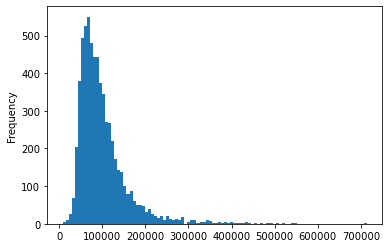

In [59]:
df['AverageInc'].plot.hist(bins=100)

The result of the histogram confirms the results of the mean, with the highest concentration of average incomes being arounf the $100,000 mean.

## Plotting the Data

I want to create bar plots of the average income of both the wealthiest regions and the poorest regions in LA County.

In order to plot the wealthiest regions, we need to sort the data in order from highest income to lowest. This sorting wil be referred to as "df_sorted"

In [47]:
#sort regions by income from high to low
df_sorted = df.sort_values(by='AverageInc', ascending=False)

In [48]:
#show first 
df_sorted.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_BLKGRP,AverageInc
1369,060372110004,15000US060372110004,Block Group 4,"Block Group 4, Census Tract 2110, Los Angeles ...",ca,150,0,ACSSF,15672,06,037,211000,4,713836.134454
2075,060372624001,15000US060372624001,Block Group 1,"Block Group 1, Census Tract 2624, Los Angeles ...",ca,150,0,ACSSF,16378,06,037,262400,1,548521.021021
5916,060377012015,15000US060377012015,Block Group 5,"Block Group 5, Census Tract 7012.01, Los Angel...",ca,150,0,ACSSF,20219,06,037,701201,5,542632.046332
2119,060372654201,15000US060372654201,Block Group 1,"Block Group 1, Census Tract 2654.20, Los Angel...",ca,150,0,ACSSF,16422,06,037,265420,1,516639.721254
5921,060377013041,15000US060377013041,Block Group 1,"Block Group 1, Census Tract 7013.04, Los Angel...",ca,150,0,ACSSF,20224,06,037,701304,1,505498.650927


This result shows the first 5 rows of the dataset now that it has been sorted from highest to lowest based on income.

Using the sorted and cleaned dataset, we will make a bar plot of the top 10 wealthiest block groups in LA County. The x axis will contain the name of the block group and the y axis is the average income

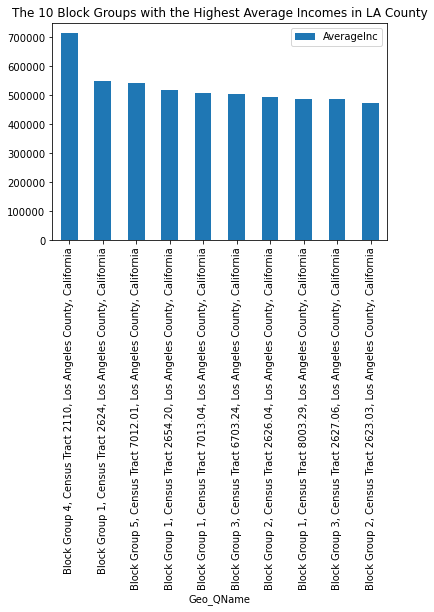

In [51]:
#make bar plot of wealthiest block groups
df_sorted.head(10).plot.bar(x='Geo_QName',
                            y='AverageInc',
                            title='The 10 Block Groups with the Highest Average Incomes in LA County')

Now that we've produced a plot for the wealthiest block groups, we will do the same for the poorest.

First we will create "df_reverse", which is a copy of our dataset sorted from lowest income to highest. This will allows to plot the poorest block groups in the same manner as the wealthiest.

In [52]:
#sort from lowest inc to highest
df_reverse = df.sort_values(by='AverageInc', ascending=True)

In [53]:
#show rows to be used in plot
df_reverse.head(10)

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_BLKGRP,AverageInc
1291,060372063001,15000US060372063001,Block Group 1,"Block Group 1, Census Tract 2063, Los Angeles ...",ca,150,0,ACSSF,15594,06,037,206300,1,8001.090909
1292,060372063002,15000US060372063002,Block Group 2,"Block Group 2, Census Tract 2063, Los Angeles ...",ca,150,0,ACSSF,15595,06,037,206300,2,10865.384615
1293,060372063003,15000US060372063003,Block Group 3,"Block Group 3, Census Tract 2063, Los Angeles ...",ca,150,0,ACSSF,15596,06,037,206300,3,12436.793422
1681,060372260022,15000US060372260022,Block Group 2,"Block Group 2, Census Tract 2260.02, Los Angel...",ca,150,0,ACSSF,15984,06,037,226002,2,14477.900552
1639,060372219001,15000US060372219001,Block Group 1,"Block Group 1, Census Tract 2219, Los Angeles ...",ca,150,0,ACSSF,15942,06,037,221900,1,16697.663551
1677,060372247003,15000US060372247003,Block Group 3,"Block Group 3, Census Tract 2247, Los Angeles ...",ca,150,0,ACSSF,15980,06,037,224700,3,16979.245283
1289,060372062001,15000US060372062001,Block Group 1,"Block Group 1, Census Tract 2062, Los Angeles ...",ca,150,0,ACSSF,15592,06,037,206200,1,17376.875000
2045,060372426003,15000US060372426003,Block Group 3,"Block Group 3, Census Tract 2426, Los Angeles ...",ca,150,0,ACSSF,16348,06,037,242600,3,18153.333333
2044,060372426002,15000US060372426002,Block Group 2,"Block Group 2, Census Tract 2426, Los Angeles ...",ca,150,0,ACSSF,16347,06,037,242600,2,18324.299065
6116,060379006062,15000US060379006062,Block Group 2,"Block Group 2, Census Tract 9006.06, Los Angel...",ca,150,0,ACSSF,20419,06,037,900606,2,18688.603989


The result of the above command shows the rows that we will use in making our plot of the poorest 10 block groups in LA County.

The following plot is created using the same commands as before. The only exceptions are the name of the dataset and the title of the plot

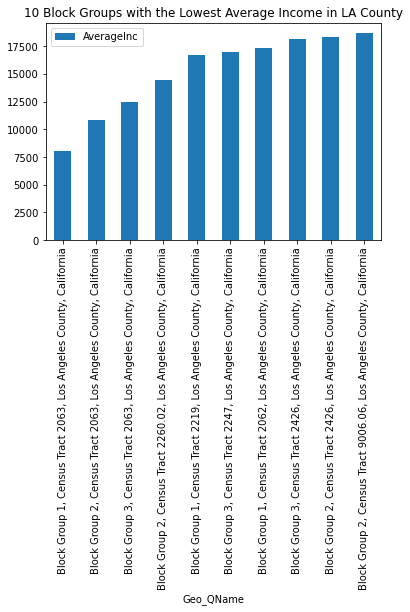

In [60]:
df_reverse.head(10).plot.bar(x='Geo_QName',
                             y='AverageInc',
                             title= '10 Block Groups with the Lowest Average Income in LA County')

## Mapping the Data
In order to map the data we need to use geopandas and a .geojson file that has the geometry of the block groups in LA County. This file will be merged with our previous csv to create a file with the census data that is readable by geopandas.

First, we import geopandas in order to read and import our .geojson file.

In [63]:
import geopandas as gpd

Next, I import the .geojson file for the census block groups.

In [91]:
#import .geojson
gdf = gpd.read_file("2010_Census_Block_Groups.geojson")

In [92]:
#show first rows of gdf
gdf.head()

,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,COMMNAME,ShapeSTArea,ShapeSTLength,geometry
0,1,060372932023,2932023,293202,0.2272,BG 3,44000,44000,Los Angeles,Los Angeles,LA City - Harbor City,6.334870e+06,10809.732641,"POLYGON ((-118.29910 33.81975, -118.29918 33.8..."
1,2,060372941201,2941201,294120,0.3144,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Wilmington,8.764387e+06,12908.543740,"POLYGON ((-118.24598 33.80005, -118.24600 33.8..."
2,3,060372932022,2932022,293202,0.0965,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Harbor City,2.689751e+06,9129.549876,"POLYGON ((-118.29908 33.82230, -118.29930 33.8..."
3,4,060372932021,2932021,293202,0.0827,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Harbor City,2.304498e+06,9332.023680,"POLYGON ((-118.29920 33.82570, -118.29939 33.8..."
4,5,060372941101,2941101,294110,0.1251,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Wilmington,3.487909e+06,9057.642084,"POLYGON ((-118.25846 33.79945, -118.25754 33.8..."


We will be combining the two datasets by using the FIPS data. As we can see, the FIPS column is named "GEOID10" in this dataset as opposed to "Geo_FIPS"

Like before, we have several columns that are unnecessary. In order to merge, we only FIPS and geometry so we can attach a geometry to each FIPS.

In [93]:
#limit columns to necessary columns
gdf = gdf[['GEOID10', 'geometry']]
#show first 5 rows of 2 columns
gdf.head()

,GEOID10,geometry
0,060372932023,"POLYGON ((-118.29910 33.81975, -118.29918 33.8..."
1,060372941201,"POLYGON ((-118.24598 33.80005, -118.24600 33.8..."
2,060372932022,"POLYGON ((-118.29908 33.82230, -118.29930 33.8..."
3,060372932021,"POLYGON ((-118.29920 33.82570, -118.29939 33.8..."
4,060372941101,"POLYGON ((-118.25846 33.79945, -118.25754 33.8..."


Now that we have limited the columns, we want to change the FIPS column to the same name as in the Census data. 

In [94]:
#change name of column
gdf.columns = ['Geo_FIPS','geometry']

In [110]:
gdf.head()

,Geo_FIPS,geometry
0,060372932023,"POLYGON ((-118.29910 33.81975, -118.29918 33.8..."
1,060372941201,"POLYGON ((-118.24598 33.80005, -118.24600 33.8..."
2,060372932022,"POLYGON ((-118.29908 33.82230, -118.29930 33.8..."
3,060372932021,"POLYGON ((-118.29920 33.82570, -118.29939 33.8..."
4,060372941101,"POLYGON ((-118.25846 33.79945, -118.25754 33.8..."


The above result shows the GEOJSON now that the columns have been adjusted and renamed

Now, we make a simple plot of the block groups. The only variable right now is the geometry, so the plot will simply show the border of each block group.

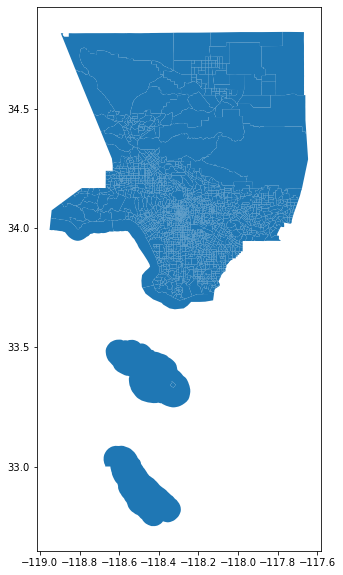

In [85]:
gdf.plot(figsize=(10,10))

Now that the variables are named the same, we can merge the geometry data and the Census data into one gdf. We merge the df and the gdf based on the "Geo_FIPS" column.

In [96]:
tracts_Income = gdf.merge(df,on='Geo_FIPS')

In [97]:
tracts_Income.head()

,Geo_FIPS,geometry,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_BLKGRP,AverageInc
0,060372932023,"POLYGON ((-118.29910 33.81975, -118.29918 33.8...",15000US060372932023,Block Group 3,"Block Group 3, Census Tract 2932.02, Los Angel...",ca,150,0,ACSSF,16693,06,037,293202,3,54509.549945
1,060372941201,"POLYGON ((-118.24598 33.80005, -118.24600 33.8...",15000US060372941201,Block Group 1,"Block Group 1, Census Tract 2941.20, Los Angel...",ca,150,0,ACSSF,16706,06,037,294120,1,84588.271605
2,060372932022,"POLYGON ((-118.29908 33.82230, -118.29930 33.8...",15000US060372932022,Block Group 2,"Block Group 2, Census Tract 2932.02, Los Angel...",ca,150,0,ACSSF,16692,06,037,293202,2,64236.453202
3,060372932021,"POLYGON ((-118.29920 33.82570, -118.29939 33.8...",15000US060372932021,Block Group 1,"Block Group 1, Census Tract 2932.02, Los Angel...",ca,150,0,ACSSF,16691,06,037,293202,1,62403.053435
4,060372941101,"POLYGON ((-118.25846 33.79945, -118.25754 33.8...",15000US060372941101,Block Group 1,"Block Group 1, Census Tract 2941.10, Los Angel...",ca,150,0,ACSSF,16703,06,037,294110,1,77187.133183


This chart shows the first five rows of the new dataset. Now that the two files have been combined, each block group has average income and the associated geometry data

Now we can use this data in order to create maps with color-coded regions based on ranges of income.
First, we will assign the scheme to "NaturalBreaks" to create the color ranges. 

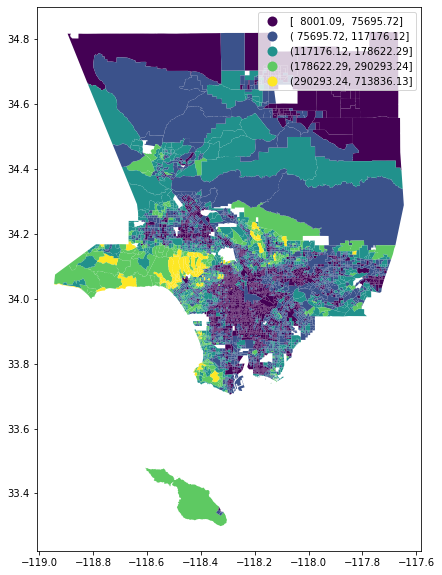

In [102]:
#plot based on Natural Breaks 
tracts_Income.plot(figsize=(12,10),
                   column="AverageInc",
                   legend=True,
                   scheme='NaturalBreaks'
                   )

This result creates a fairly detailed map of the incomes of each block group. As we can see from the results, there is a higher concentration of lower income residents in Downtown LA.

Next, we can make the same plot but assign the color ranges based on equal intervals.

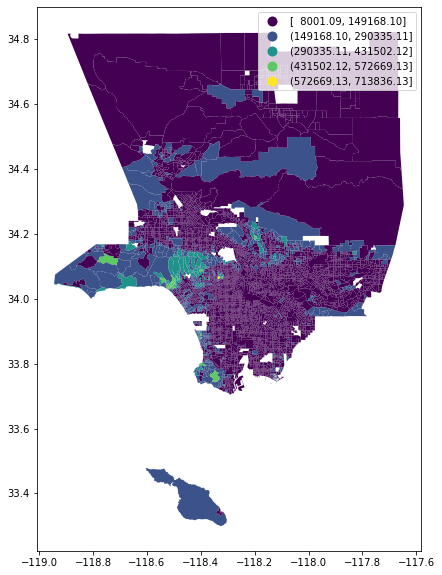

In [107]:
#plot colors with equal intervals
tracts_Income.plot(figsize=(12,10),
                   column='AverageInc',
                   legend=True,
                   scheme='equal_interval')

Because of the outliers on the upper end of the income spectrum, the equal interval plot does not produce a useful result. Almost the entire map is purple, which is income from about $8,000 to $150,000.

Lastly, we will create a map with color ranges based on quantiles of the data. This should produce the most significant map because each color will represent the same amount of people.

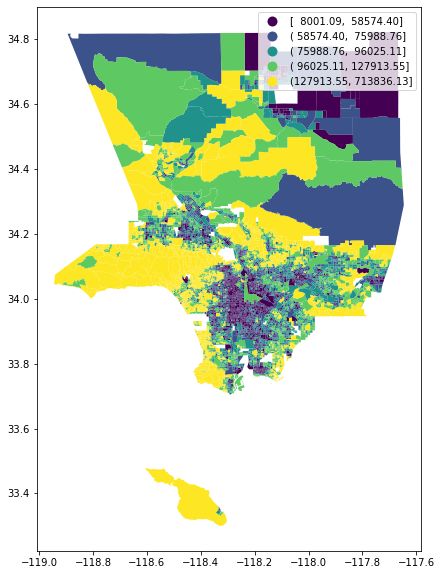

In [108]:
#plot based on quantiles
tracts_Income.plot(figsize=(12,10),
                   column='AverageInc',
                   legend=True,
                   scheme='quantiles')

Because there are more outliers on the upper end of the spectrum, the yellow range, or top 20%, is very wide. As a result, this map shows more variation in communities under $128,000, but still has its shortcomings. Because I am mostly looking at environmental impacts in lower income communities, this map could be the most useful for my project.